In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [46]:
exercise = pd.read_csv('myfitnesspal/Exercise-Summary.csv', index_col = 0)
measurement = pd.read_csv('myfitnesspal/Measurement-Summary.csv', index_col = 0)
nutrition = pd.read_csv('myfitnesspal/Nutrition-Summary.csv', index_col = 0)

In [47]:
exercise.index = pd.to_datetime(exercise.index)
measurement.index = pd.to_datetime(measurement.index)
nutrition.index = pd.to_datetime(nutrition.index)

print("Exercise Period :  ", exercise.index[0] , ' - ', exercise.index[-1])
print("Measurement Period :  ", measurement.index[0] , ' - ', measurement.index[-1])
print("Nutrition Period :  ", nutrition.index[0] , ' - ', nutrition.index[-1])

print("Overall Period: ", min(exercise.index[0],measurement.index[0],nutrition.index[0]), ' - ',
                          max(exercise.index[-1],measurement.index[-1],nutrition.index[-1]))

startDate = min(exercise.index[0],measurement.index[0],nutrition.index[0])
endDate = max(exercise.index[-1],measurement.index[-1],nutrition.index[-1])

Exercise Period :   2012-11-10 00:00:00  -  2018-03-06 00:00:00
Measurement Period :   2012-11-10 00:00:00  -  2018-03-06 00:00:00
Nutrition Period :   2012-11-10 00:00:00  -  2018-03-06 00:00:00
Overall Period:  2012-11-10 00:00:00  -  2018-03-06 00:00:00


In [48]:
exercise.head()

,Exercise,Type,Exercise Calories,Exercise Minutes,Sets,Reps Per Set,Kilograms,Steps
Date,,,,,,,,
2012-11-10,Dips,Strength,NaN,NaN,7.0,10.0,36.3,NaN
2012-11-10,"Rowing, stationary, very vigorous effort",Cardio,227.0,22.0,NaN,NaN,NaN,NaN
2012-11-10,"Step-ups, vigorous",Cardio,251.0,20.0,NaN,NaN,NaN,NaN
2012-11-11,Chin-Ups,Strength,NaN,NaN,3.0,8.0,36.3,NaN
2012-11-11,Dips,Strength,NaN,NaN,5.0,10.0,36.3,NaN


In [49]:
exercise.fillna(value=0, inplace=True)

def boolStrength(x):
    if x == 0.0:
        return '1' # yes
    else:
        return '0' # no
    
exercise_agg = pd.DataFrame(index=pd.date_range(start=startDate, end=endDate ,freq='D'))

In [50]:
for column in exercise.columns:
    if column in ['Exercise Calories', 'Exercise Minutes', 'Steps', 'Sets', 'Reps Per Set']:
        exercise_agg[column] = exercise.groupby('Date')[column].sum()
        
exercise_agg['Strength Training'] = exercise.groupby('Date')['Exercise Calories'].min()
exercise_agg['Strength Training'] = exercise_agg['Strength Training'].apply(lambda x: boolStrength(x))

In [51]:
exercise_agg.fillna(value=0, inplace=True)

In [52]:
exercise_agg.head()

,Exercise Calories,Exercise Minutes,Sets,Reps Per Set,Steps,Strength Training
2012-11-10,478.0,42.0,7.0,10.0,0.0,1
2012-11-11,577.0,55.0,8.0,18.0,0.0,1
2012-11-12,482.0,55.0,0.0,0.0,0.0,0
2012-11-13,441.0,40.0,3.0,10.0,0.0,1
2012-11-14,0.0,0.0,0.0,0.0,0.0,0


In [53]:
measurement.head()

,% Body Fat,Biceps,Calves,Hips,Neck,Tights,Waist,Weight
Date,,,,,,,,
2012-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.8
2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.1
2012-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.5
2012-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.9
2012-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.2


In [54]:
measurement_agg = pd.DataFrame(index=pd.date_range(start=startDate, end=endDate ,freq='D'))

In [55]:
for column in measurement.columns:
    measurement_agg[column] = measurement.groupby('Date')[column].mean()
    measurement_agg[column].interpolate(inplace=True)
    
measurement_agg['Height'] = 1.76  #constant durting the entire period
measurement_agg['BMI'] = np.round(measurement_agg['Weight'] / measurement_agg['Height']**2,2)
measurement_agg['Age'] = np.round((measurement_agg.index - pd.Timestamp('1988-06-07')) / pd.Timedelta(days=365),1)

In [56]:
measurement_agg.head()

,% Body Fat,Biceps,Calves,Hips,Neck,Tights,Waist,Weight,Height,BMI,Age
2012-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.80,1.76,36.74,24.4
2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.10,1.76,36.83,24.4
2012-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.80,1.76,36.74,24.4
2012-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.50,1.76,36.64,24.5
2012-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.58,1.76,36.67,24.5


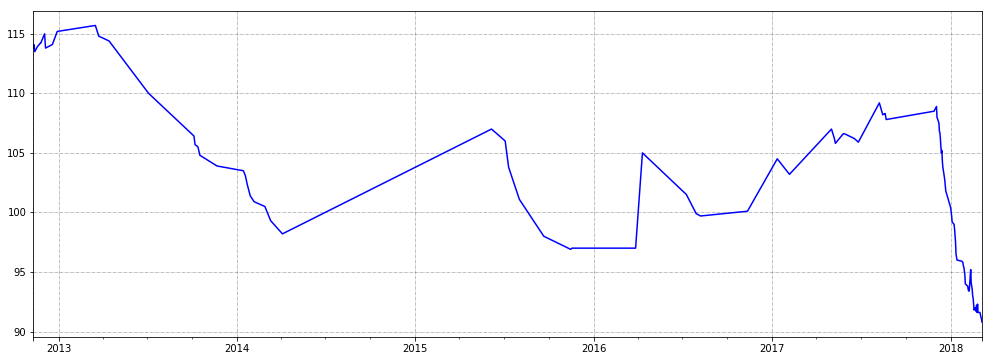

In [57]:
fig, axes = plt.subplots()
fig.set_size_inches(17, 6)
measurement_agg['Weight'].plot.line(color='b')
axes.grid(color='black', alpha=0.5, linestyle='-.', linewidth=0.5)

In [58]:
nutrition.head()

,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron
Date,,,,,,,,,,,,,,,,,,
2012-11-10,Breakfast,230.0,18.8,2.6,4.0,8.0,0.0,0.0,120.2,190.0,5.4,3.2,1.2,12.8,0.0,0.0,34.0,8.0
2012-11-10,Lunch,805.0,35.0,14.7,0.0,11.9,0.0,182.0,2597.0,0.0,91.0,22.4,0.0,35.0,0.0,0.0,0.0,0.0
2012-11-10,Dinner,829.2,56.1,22.6,3.7,19.5,0.0,0.0,281.0,1627.5,74.0,7.5,72.0,25.7,89.6,127.8,17.8,12.2
2012-11-11,Breakfast,574.0,28.4,18.7,0.0,0.0,0.0,0.0,186.0,0.0,60.7,0.0,53.9,18.5,0.0,0.0,0.0,0.0
2012-11-11,Lunch,805.0,35.0,14.7,0.0,11.9,0.0,182.0,2597.0,0.0,91.0,22.4,0.0,35.0,0.0,0.0,0.0,0.0


In [59]:
nutrition['Fat'] = nutrition['Fat (g)']
nutrition['Sodium'] = nutrition['Sodium (mg)']
nutrition['Carbohydrates'] = nutrition['Carbohydrates (g)']
nutrition['Protein'] = nutrition['Protein (g)']

nutrition.drop(['Fat (g)', 'Sodium (mg)', 'Carbohydrates (g)', 'Protein (g)'],axis=1,inplace=True)

In [60]:
nutrition_agg = pd.DataFrame(index=pd.date_range(start=startDate, end=endDate ,freq='D'))

In [61]:
nutrition.fillna(value=0, inplace=True)

for column in nutrition.columns:
    nutrition_agg[column] = nutrition.groupby('Date')[column].sum()
    
nutrition_agg['Number of Meals'] = nutrition.groupby('Date')['Meal'].count()

In [62]:
nutrition_agg.drop('Meal', axis=1, inplace=True)
nutrition_agg.fillna(value=0,inplace=True)
nutrition_agg.head()

,Calories,Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Potassium,Fiber,Sugar,Vitamin A,Vitamin C,Calcium,Iron,Fat,Sodium,Carbohydrates,Protein,Number of Meals
2012-11-10,1864.2,39.9,7.7,39.4,0.0,182.0,1817.5,33.1,73.2,89.6,127.8,51.8,20.2,109.9,2998.2,170.4,73.5,3.0
2012-11-11,2065.8,44.8,3.6,31.3,0.0,226.6,1638.6,30.8,100.4,78.4,114.7,44.2,14.1,105.0,3572.8,219.1,72.3,4.0
2012-11-12,2933.9,40.4,3.7,19.4,0.0,197.6,2753.0,21.7,112.9,84.7,128.8,55.0,28.8,188.9,2510.0,243.2,91.7,3.0
2012-11-13,2014.8,28.0,5.9,37.4,0.0,650.6,1737.6,36.4,74.3,88.5,93.5,48.2,69.2,91.2,3496.8,215.9,71.8,4.0
2012-11-14,1032.0,19.0,0.0,0.0,0.4,80.0,0.0,6.0,32.0,20.0,16.0,40.0,72.0,35.0,2745.0,142.0,46.0,3.0


In [63]:
fullData = pd.concat([nutrition_agg, exercise_agg, measurement_agg], axis=1)
fullData.head()

,Calories,Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Potassium,Fiber,Sugar,Vitamin A,...,Biceps,Calves,Hips,Neck,Tights,Waist,Weight,Height,BMI,Age
2012-11-10,1864.2,39.9,7.7,39.4,0.0,182.0,1817.5,33.1,73.2,89.6,...,NaN,NaN,NaN,NaN,NaN,NaN,113.80,1.76,36.74,24.4
2012-11-11,2065.8,44.8,3.6,31.3,0.0,226.6,1638.6,30.8,100.4,78.4,...,NaN,NaN,NaN,NaN,NaN,NaN,114.10,1.76,36.83,24.4
2012-11-12,2933.9,40.4,3.7,19.4,0.0,197.6,2753.0,21.7,112.9,84.7,...,NaN,NaN,NaN,NaN,NaN,NaN,113.80,1.76,36.74,24.4
2012-11-13,2014.8,28.0,5.9,37.4,0.0,650.6,1737.6,36.4,74.3,88.5,...,NaN,NaN,NaN,NaN,NaN,NaN,113.50,1.76,36.64,24.5
2012-11-14,1032.0,19.0,0.0,0.0,0.4,80.0,0.0,6.0,32.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,113.58,1.76,36.67,24.5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


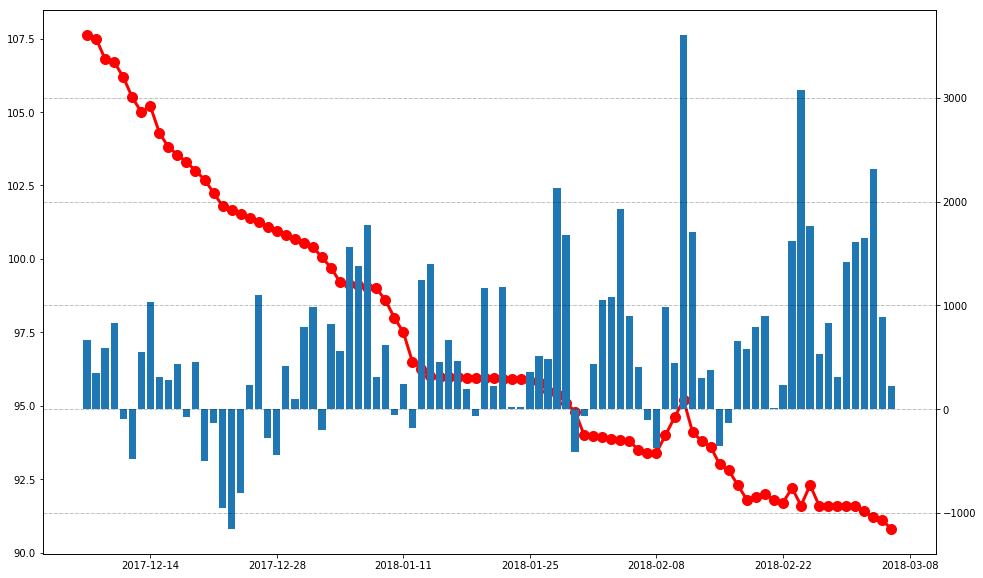

In [64]:
df = fullData['2017-12-07':]
df.index.name = 'Date'
df['Net Calories'] = nutrition_agg['Calories'] - exercise_agg['Exercise Calories']

fig, axes = plt.subplots()
fig.set_size_inches(16, 10)

axes.plot(df.index, df['Weight'], 'r', lw=3, marker='o', markersize=10)

axes2 = axes.twinx()
axes2.bar(df.index, df['Net Calories'])
axes2.grid(color='black', alpha=0.5, linestyle='-.', linewidth=0.5)

In [65]:
df.columns

Index(['Calories', 'Saturated Fat', 'Polyunsaturated Fat',
       'Monounsaturated Fat', 'Trans Fat', 'Cholesterol', 'Potassium', 'Fiber',
       'Sugar', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'Fat', 'Sodium',
       'Carbohydrates', 'Protein', 'Number of Meals', 'Exercise Calories',
       'Exercise Minutes', 'Sets', 'Reps Per Set', 'Steps',
       'Strength Training', '% Body Fat', 'Biceps', 'Calves', 'Hips', 'Neck',
       'Tights', 'Waist', 'Weight', 'Height', 'BMI', 'Age', 'Net Calories'],
      dtype='object')

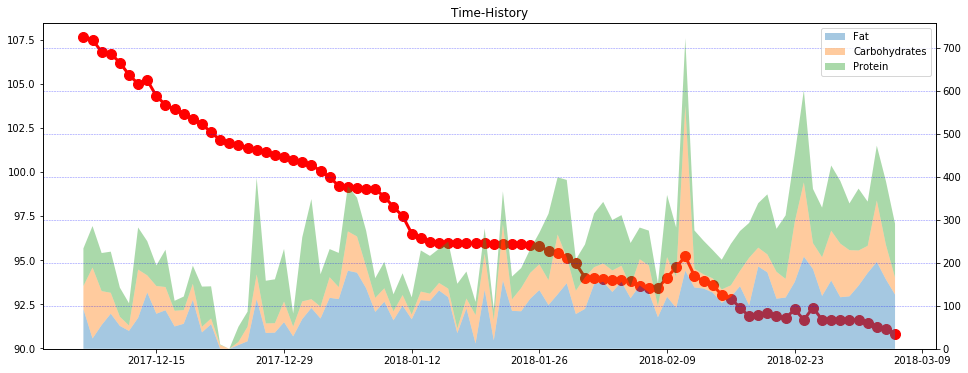

In [66]:
fig, axes = plt.subplots()

fig.set_size_inches(16, 6)

labels = ["Fat", "Carbohydrates", "Protein"]

axes2 = axes.twinx()

axes2.stackplot(df.index, df['Fat'], 
                         df['Carbohydrates'], 
                         df['Protein'],
                         labels = labels, alpha=0.4)

axes.plot(df.index, df['Weight'], 'r', lw=3, marker='o', markersize=10)

axes2.legend(loc='best') #bbox_to_anchor=(1.1, 0.5)
axes2.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes2.set_title('Time-History');

In [67]:
df2 = df[[   'Fat', 
             'Carbohydrates', 
             'Protein', 
             'Weight', 
             'Calories',
             'Potassium',
             'Fiber',
             'Sugar',
             'Sodium',
             'Vitamin C',
             'Vitamin A',
             'Iron',
             'Cholesterol',
             'Number of Meals',
             'Exercise Calories',
             'Exercise Minutes',
             'Net Calories',
             'Age',
             'Steps']]

In [68]:
df2['Cumulative Caloric Balance'] = (df2['Weight'] - df2.ix[0]['Weight'])*9000
df2['Caloric Balance'] = df2['Cumulative Caloric Balance'].diff()
df2['Daily BMR'] = df2['Caloric Balance'] - df2['Net Calories']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

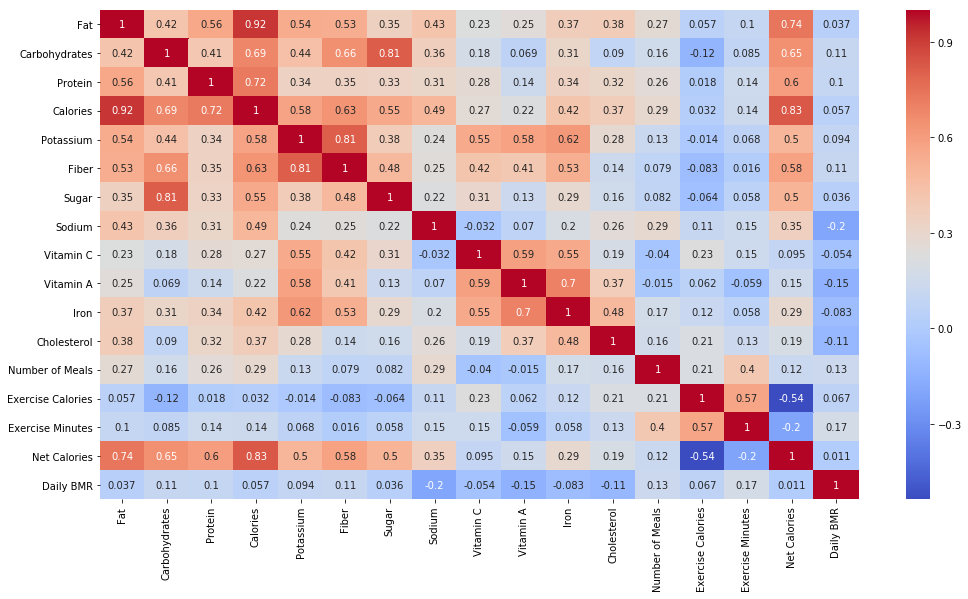

In [69]:
fig, ax = plt.subplots(figsize=(17,9)) # increasing the original size of the heatmap
sns.heatmap(df2[['Fat', 
             'Carbohydrates', 
             'Protein', 
             'Calories',
             'Potassium',
             'Fiber',
             'Sugar',
             'Sodium',
             'Vitamin C',
             'Vitamin A',
             'Iron',
             'Cholesterol',
             'Number of Meals',
             'Exercise Calories',
             'Exercise Minutes',
             'Net Calories', 'Daily BMR']].corr(), cmap='coolwarm', annot=True)

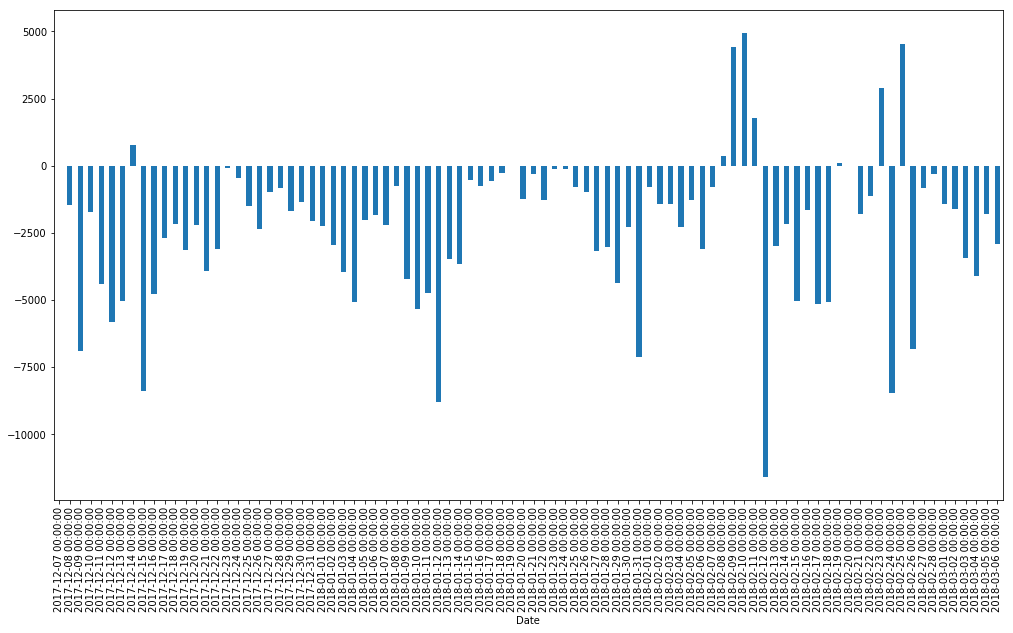

In [70]:
fig, ax = plt.subplots(figsize=(17,9))
df2['Daily BMR'].plot.bar()

In [71]:
X = df2[[    'Sodium',
             'Vitamin C',
             'Cholesterol',
             'Exercise Minutes']]

y = df2['Daily BMR']
y.ix[0] = np.mean(y)

y.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Date
2017-12-07   -2303.603371
2017-12-08   -1473.000000
2017-12-09   -6892.700000
2017-12-10   -1733.700000
2017-12-11   -4407.100000
Freq: D, Name: Daily BMR, dtype: float64

In [72]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

lm = sm.OLS(y, X)
prediction = lm.fit(use_t=True)

print(prediction.summary())

                            OLS Regression Results                            
Dep. Variable:              Daily BMR   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     14.84
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           2.93e-09
Time:                        21:56:16   Log-Likelihood:                -839.94
No. Observations:                  90   AIC:                             1688.
Df Residuals:                      86   BIC:                             1698.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Sodium              -0.5113      0.138  

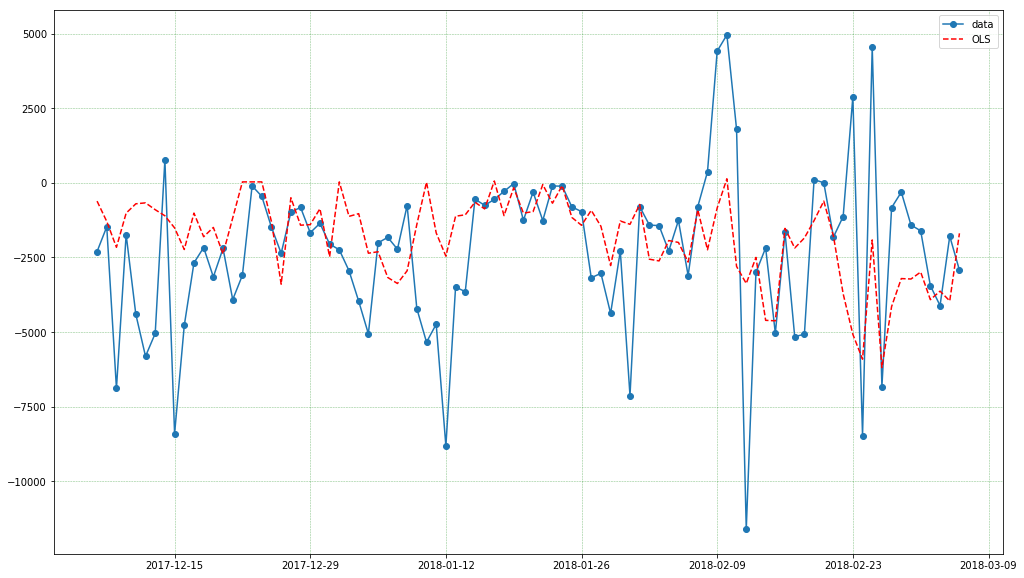

In [73]:
prstd, iv_l, iv_u = wls_prediction_std(prediction)

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(df2.index, y, 'o-', label="data")
ax.plot(df2.index, prediction.fittedvalues, 'r--', label="OLS")
#ax.plot(df2.index, iv_u, 'r--')
#ax.plot(df2.index, iv_l, 'r--')
ax.legend(loc='best');
ax.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

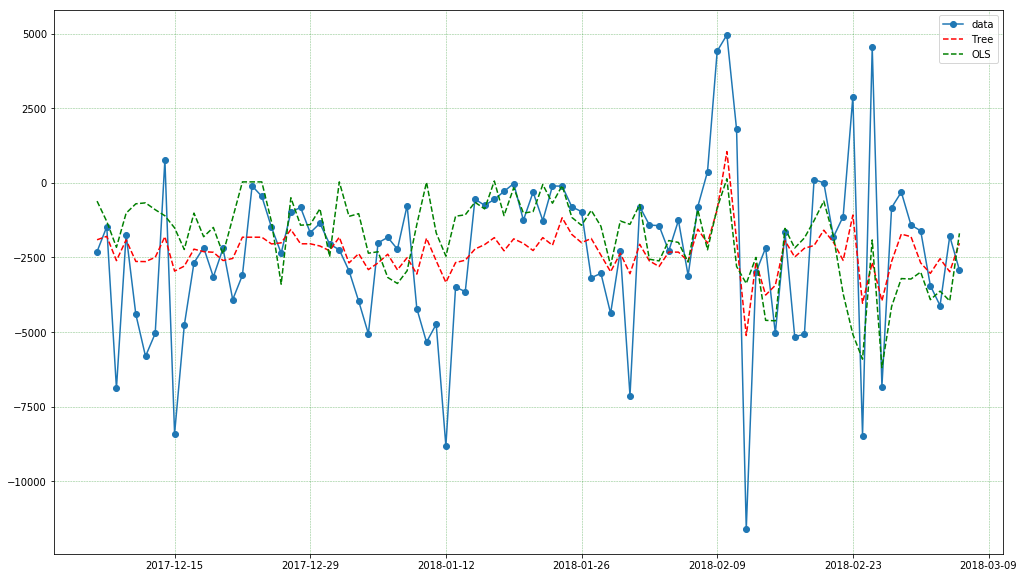

In [74]:
from sklearn.ensemble import RandomForestRegressor

features = X.columns

forest = RandomForestRegressor(n_estimators=1500, random_state = 0, oob_score = True, max_depth=3, max_features=0.33)
forest.fit(X, y)

forest.oob_score_

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(df2.index, y, 'o-', label="data")
ax.plot(df2.index, forest.predict(X), 'r--', label="Tree")
ax.plot(df2.index, prediction.fittedvalues, 'g--', label="OLS")

ax.legend(loc='best');
ax.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

([<matplotlib.axis.YTick at 0x20cf3e87438>,
 <a list of 4 Text yticklabel objects>)

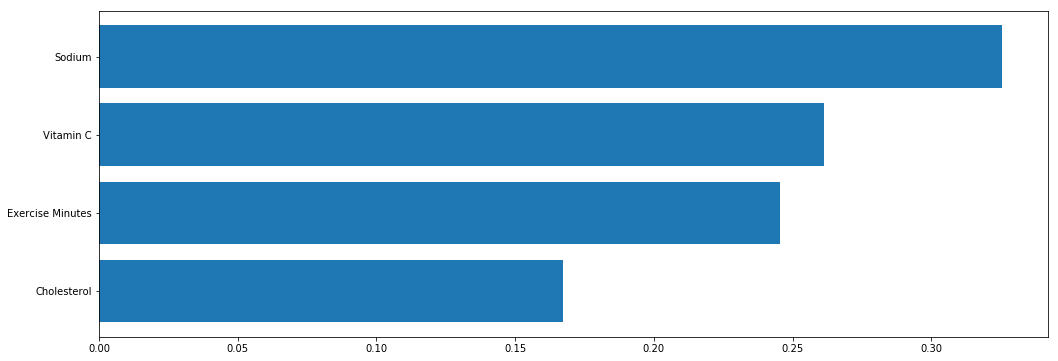

In [75]:
forest.feature_importances_

bar_x = range(len(forest.feature_importances_))

indices = np.argsort(forest.feature_importances_)
sorted_importances = []

for i in indices:
    sorted_importances.append(X.columns[i])

fig, ax = plt.subplots(figsize=(17,6))
plt.barh(bar_x, forest.feature_importances_[indices])
plt.yticks(bar_x, sorted_importances)

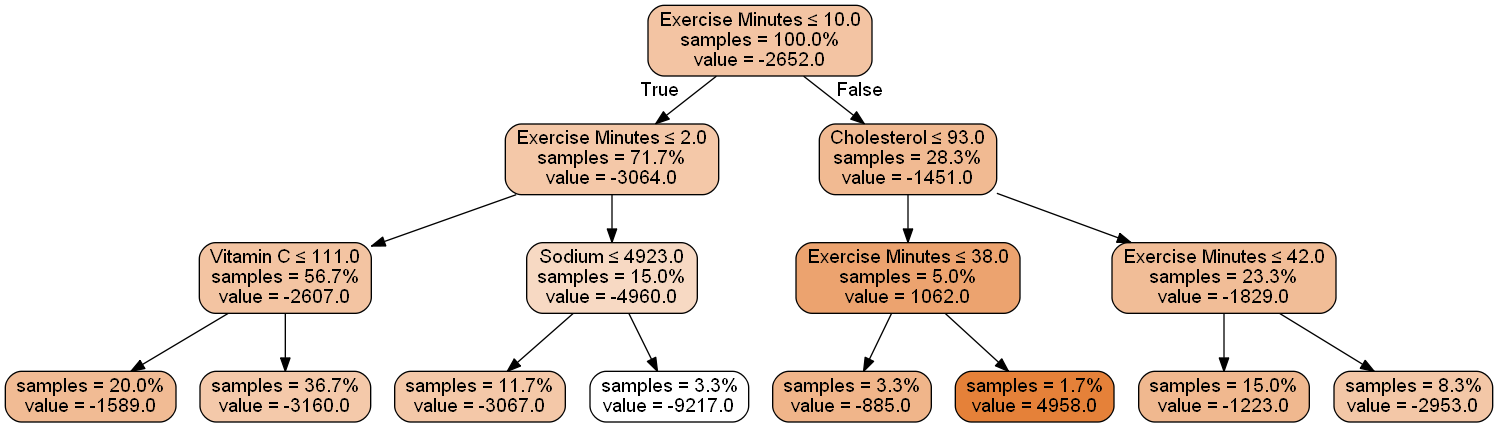

In [76]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

import os     
os.environ["PATH"] += os.pathsep + 'C:/anaconda3/Library/bin/graphviz'

tree_scores = [tree.score(X, y) for tree in forest]

best_tree = tree_scores.index(max(tree_scores))

dot_data = StringIO()
export_graphviz(forest[best_tree], 
                out_file=dot_data,  
                filled=True,
                precision=0,
                special_characters=True,
                feature_names=features,
                leaves_parallel=True,
                rounded=True,
                rotate=False, 
                proportion=True, 
                impurity=False
               )
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [77]:
df2.columns

Index(['Fat', 'Carbohydrates', 'Protein', 'Weight', 'Calories', 'Potassium',
       'Fiber', 'Sugar', 'Sodium', 'Vitamin C', 'Vitamin A', 'Iron',
       'Cholesterol', 'Number of Meals', 'Exercise Calories',
       'Exercise Minutes', 'Net Calories', 'Age', 'Steps',
       'Cumulative Caloric Balance', 'Caloric Balance', 'Daily BMR'],
      dtype='object')

In [78]:
df2['Intensity'] = df2['Weight']*df2['Steps']/df2['Exercise Minutes']
df2['Food'] = (df2['Fat'] + df2['Carbohydrates'] + df2['Protein'] + df2['Sugar'])/(df2['Number of Meals']+1)
df2['Vitamins'] = df2['Vitamin C'] + df2['Vitamin A'] + df2['Iron'] + df2['Potassium'] + df2['Sodium']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [95]:
X = df2[[ 
       'Fat', 'Carbohydrates', 'Protein', 'Calories', 'Potassium',
       'Fiber', 'Sugar', 'Sodium', 'Vitamin C', 'Vitamin A', 'Iron',
       'Cholesterol', 'Number of Meals', 'Intensity', 'Net Calories'
       ]]


#X['Const'] = 1
'''
Y = df2[1:]['Daily BMR'].values
Y = np.append(Y,np.mean(Y))
y = pd.Series(data = Y, index=pd.date_range(start=pd.Timestamp('2017-12-07'), end=endDate ,freq='D'))
'''

y = df2['Daily BMR']

In [96]:
lm = sm.OLS(y, X)
prediction = lm.fit(use_t=True)

print(prediction.summary())

                            OLS Regression Results                            
Dep. Variable:              Daily BMR   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     5.647
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           1.56e-07
Time:                        22:00:48   Log-Likelihood:                -829.55
No. Observations:                  90   AIC:                             1689.
Df Residuals:                      75   BIC:                             1727.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Fat                43.7470     31.150     

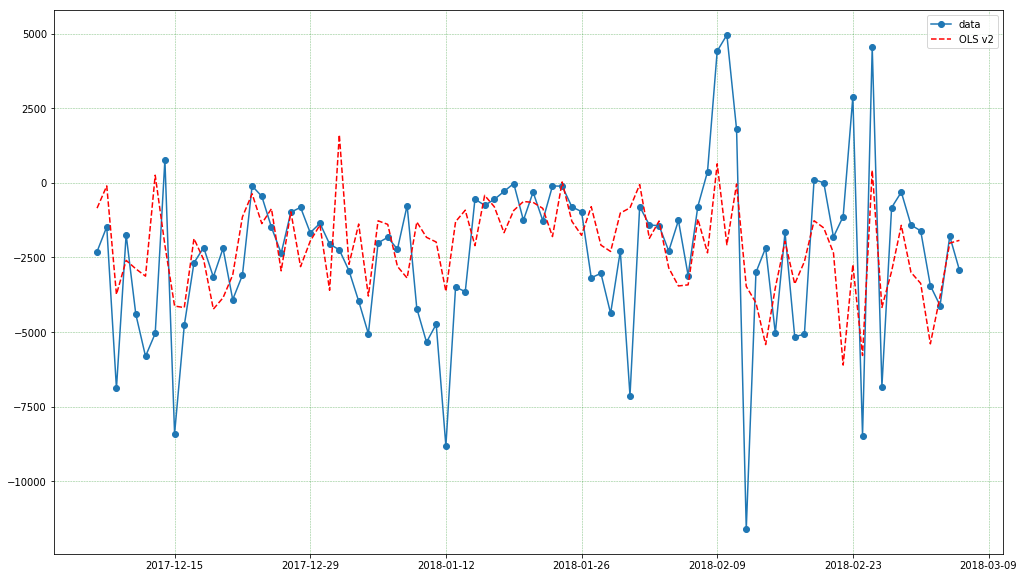

In [97]:
prstd, iv_l, iv_u = wls_prediction_std(prediction)

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(df2.index, y, 'o-', label="data")
ax.plot(df2.index, prediction.fittedvalues, 'r--', label="OLS v2")
#ax.plot(df2.index, iv_u, 'r--')
#ax.plot(df2.index, iv_l, 'r--')
ax.legend(loc='best');
ax.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

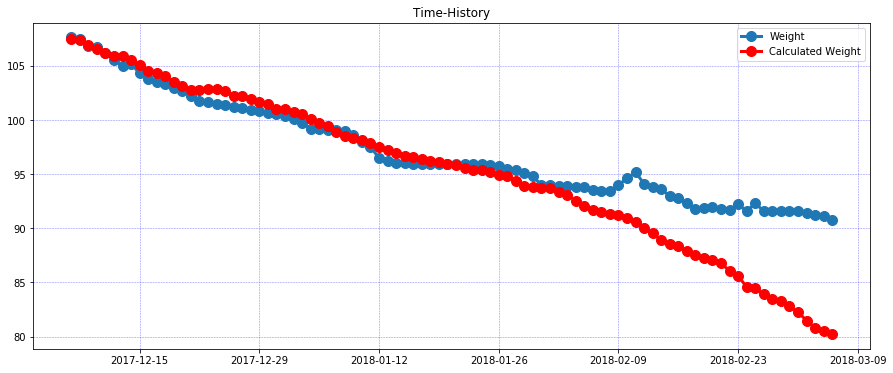

In [98]:
#df2['BMR'] = np.dot(X, prediction.params)
df2['BMR'] = prediction.predict(X)
df2['Caloric Balance'] = df2['Net Calories'] - df2['BMR']
df2['Cumulative Caloric Balance'] = df2['Caloric Balance'].cumsum()
df2['Calculated Weight'] = df2.ix[0]['Weight'] - df2['Cumulative Caloric Balance']/9000

fig, axes = plt.subplots()

fig.set_size_inches(15, 6)

axes.plot(df2.index, df2['Weight'], lw=3, marker='o', markersize=10)
axes.plot(df2.index, df2['Calculated Weight'], 'r', lw=3, marker='o', markersize=10)

axes.legend()
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes.set_title('Time-History');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

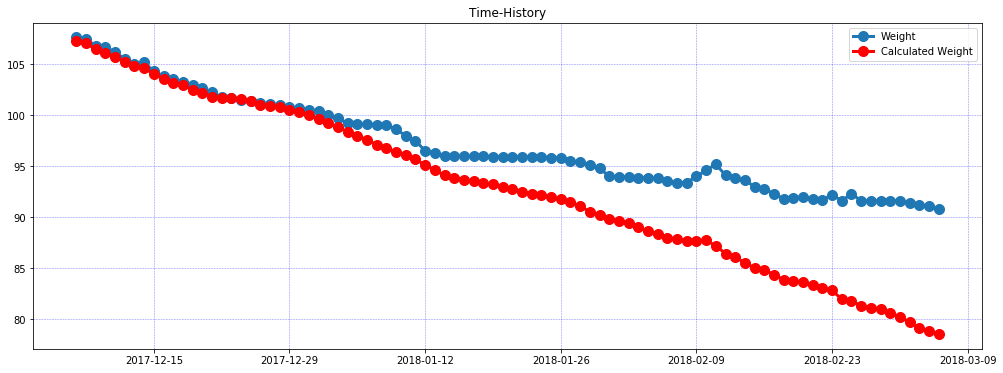

In [117]:
forest = RandomForestRegressor(n_estimators=5000, max_depth=5, min_samples_leaf=3, min_samples_split=5)

forest.fit(X, y)

df2['BMR'] = forest.predict(X)
df2['Caloric Balance'] = df2['Net Calories'] - df2['BMR']
df2['Cumulative Caloric Balance'] = df2['Caloric Balance'].cumsum()
df2['Calculated Weight'] = df2.ix[0]['Weight'] - df2['Cumulative Caloric Balance']/9000

fig, axes = plt.subplots()

fig.set_size_inches(17, 6)

axes.plot(df2.index, df2['Weight'], lw=3, marker='o', markersize=10)
axes.plot(df2.index, df2['Calculated Weight'], 'r', lw=3, marker='o', markersize=10)

axes.legend()
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes.set_title('Time-History');

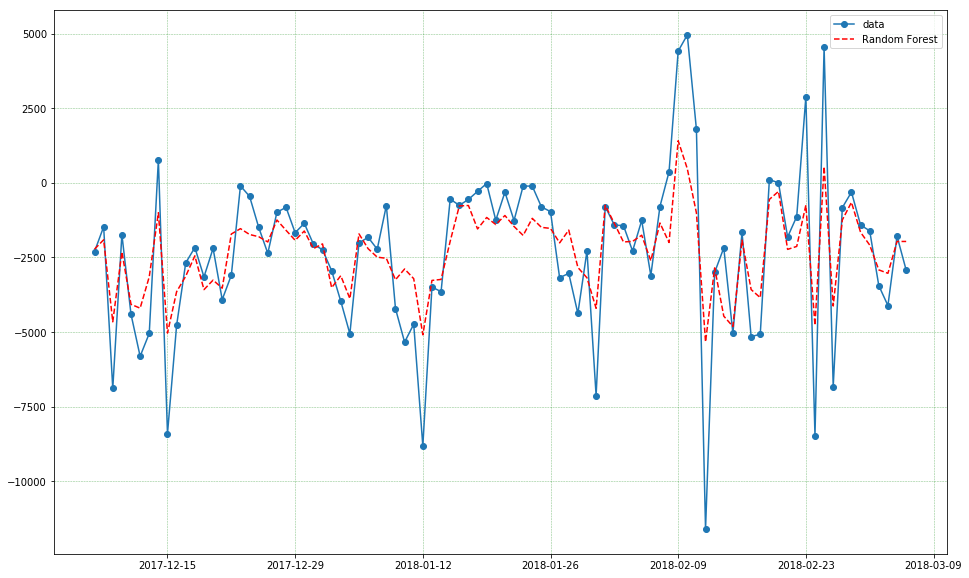

In [118]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(df2.index, y, 'o-', label="data")
ax.plot(df2.index, forest.predict(X), 'r--', label="Random Forest")
ax.legend(loc='best');
ax.grid(color='green', alpha=0.5, linestyle='dashed', linewidth=0.5)

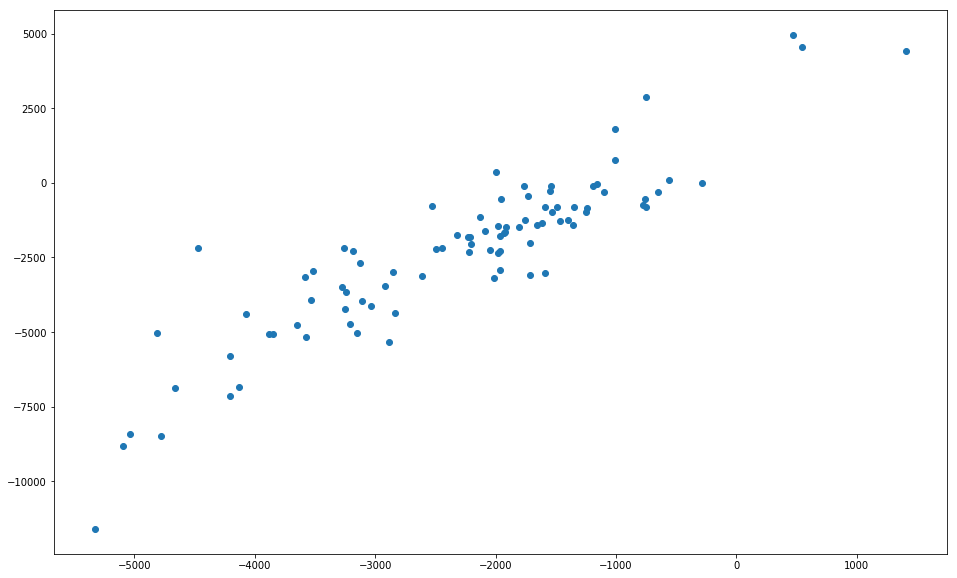

In [119]:
fig, ax = plt.subplots(figsize=(16,10))
plt.scatter(forest.predict(X), y)

In [120]:
df2['BMR'].describe()

count      90.000000
mean    -2305.279098
std      1309.364985
min     -5330.597802
25%     -3205.119211
50%     -2005.959735
75%     -1529.418404
max      1410.478442
Name: BMR, dtype: float64

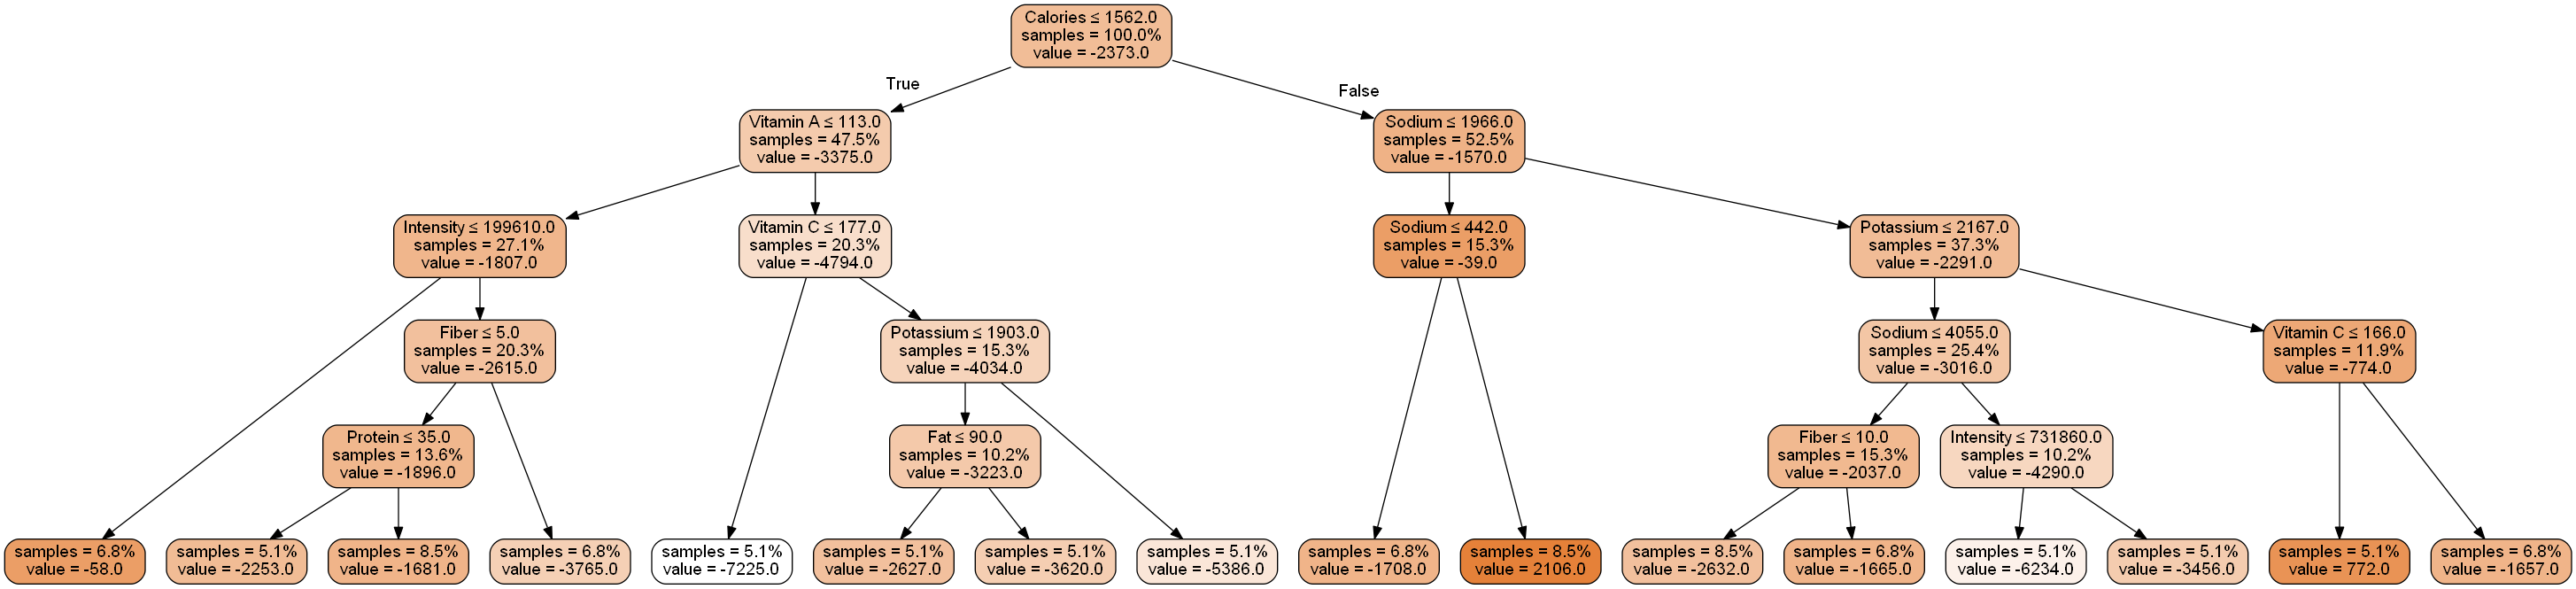

In [121]:
features = X.columns

tree_scores = [tree.score(X, y) for tree in forest]

best_tree = tree_scores.index(max(tree_scores))

dot_data = StringIO()
export_graphviz(forest[best_tree], 
                out_file=dot_data,  
                filled=True,
                precision=0,
                special_characters=True,
                feature_names=features,
                leaves_parallel=True,
                rounded=True,
                rotate=False, 
                proportion=True, 
                impurity=False
               )
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

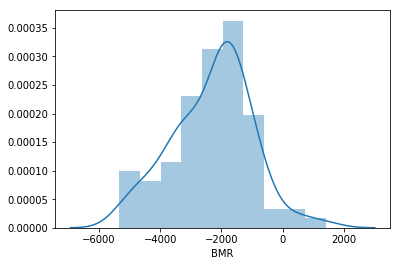

In [122]:
sns.distplot(df2['BMR'])